Text(0, 0.5, '% Variance captured')

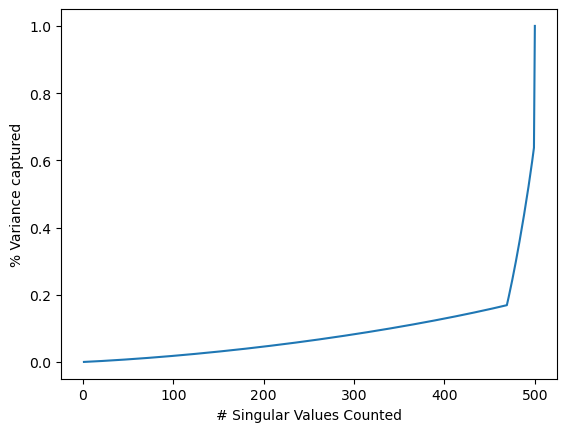

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.genfromtxt('data2D.csv', delimiter=',')
data2 = np.genfromtxt('data1000D.csv', delimiter=',')

def calcReconstructionError(X, R):
    return np.linalg.norm(X - R) / X.shape[0]

#Buggy PCA
def PCA_1(X, d):
    U, S, Vh = np.linalg.svd(X)
    Sigma = np.zeros((X.shape[0], X.shape[1]))
    if (X.shape[0] < X.shape[1]):
        Sigma[0:X.shape[0], 0:X.shape[0]] = np.diagflat(S)
    else:
        Sigma[0:X.shape[1], 0:X.shape[1]] = np.diagflat(S)
    W = X.dot(Vh[0:d,:].transpose())
    R = W.dot(Vh[0:d,:])
    return (U, Sigma, Vh, W, R)
    
#Demeaned PCA
def PCA_2(X, d):
    d_X = np.copy(X)
    for i in range(d_X.shape[1]):
        d_X[:,i] = d_X[:,i] - np.mean(d_X[:,i])
    U, Sigma, Vh, W, R = PCA_1(d_X, d)
    #Scale back reconstruction
    for i in range(R.shape[1]):
        R[:,i] = R[:,i] + np.mean(X[:,i])
    return (U, Sigma, Vh, W, R)
    
#Normalized PCA
def PCA_3(X, d):
    d_X = np.copy(X)
    for i in range(d_X.shape[1]):
        d_X[:,i] = d_X[:,i] - np.mean(d_X[:,i])
        d_X[:,i] = d_X[:,i] / np.std(d_X[:,i])
    U, Sigma, Vh, W, R = PCA_1(d_X, d)
    #Scale back representation
    for i in range(R.shape[1]):
        R[:,i] = R[:,i] * np.std(X[:,i])
        R[:,i] = R[:,i] + np.mean(X[:,i])
    return (U, Sigma, Vh, W, R) 
 
#Choose d for 1000D dataset, print singular values
d2_svals = np.flip(np.linalg.svd(data2)[1])
d2_svals_frac = np.zeros(len(d2_svals))
d2_svals_sum = np.sum(d2_svals)
for i in range(len(d2_svals)):
    d2_svals_frac[i] = np.sum(d2_svals[0:i+1]) / d2_svals_sum

plt.plot(np.arange(1, len(d2_svals)+1), d2_svals_frac)
plt.xlabel("# Singular Values Counted")
plt.ylabel("% Variance captured")

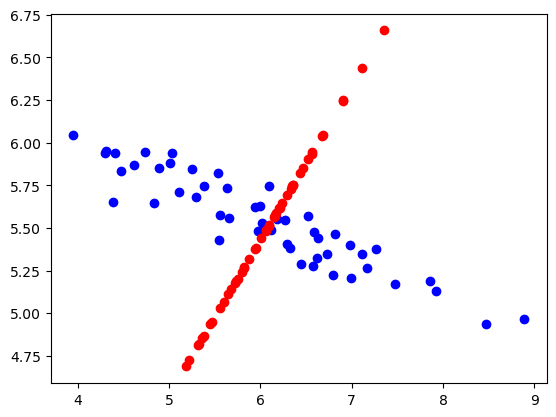

In [2]:
#Buggy PCA
R = PCA_1(data1, 1)[4]
plt.scatter(data1[:,0], data1[:,1], color='blue')
plt.scatter(R[:,0], R[:,1], color='red')

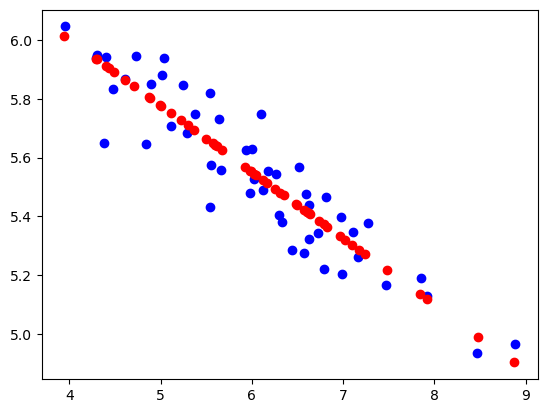

In [3]:
#Normalized PCA
R = PCA_2(data1, 1)[4]
plt.scatter(data1[:,0], data1[:,1], color='blue')
plt.scatter(R[:,0], R[:,1], color='red')

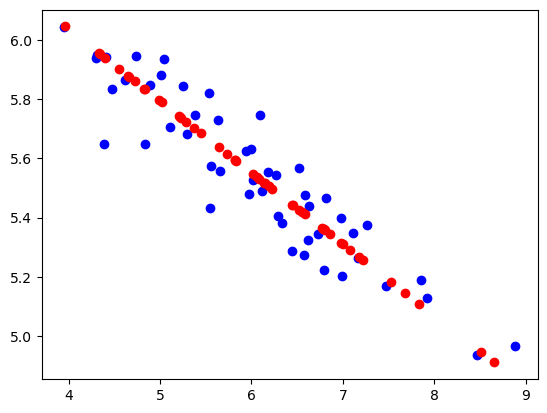

In [4]:
#Normalized PCA
R = PCA_3(data1, 1)[4]
plt.scatter(data1[:,0], data1[:,1], color='blue')
plt.scatter(R[:,0], R[:,1], color='red')

In [5]:
#Print reconstruction errors:

print("For 2D Dataset:")
E_data1_1 = calcReconstructionError(data1, PCA_1(data1, 1)[4])
print("Buggy PCA Error: " + str(E_data1_1))
E_data1_2 = calcReconstructionError(data1, PCA_2(data1, 1)[4])
print("Demeaned PCA Error: " + str(E_data1_2))
E_data1_3 = calcReconstructionError(data1, PCA_3(data1, 1)[4])
print("Normalized PCA Error: " + str(E_data1_3))

print("\n")
print("For 1000D dataset: ")
E_data2_1 = calcReconstructionError(data2, PCA_1(data2, 50)[4])
print("Buggy PCA Error: " + str(E_data2_1))
E_data2_2 = calcReconstructionError(data2, PCA_2(data2, 50)[4])
print("Demeaned PCA Error: " + str(E_data2_2))
E_data2_3 = calcReconstructionError(data2, PCA_3(data2, 50)[4])
print("Normalized PCA Error: " + str(E_data2_3))

For 2D Dataset:
Buggy PCA Error: 0.13318431467217107
Demeaned PCA Error: 0.014146438158429078
Normalized PCA Error: 0.031455391733300885


For 1000D dataset: 
Buggy PCA Error: 0.6987117882041534
Demeaned PCA Error: 0.6970653954127897
Normalized PCA Error: 0.6997364865896939
